# 📌 𝐃𝐚𝐲 𝟏𝟗: 𝐍𝐚ï𝐯𝐞 𝐁𝐚𝐲𝐞𝐬 – 𝐏𝐫𝐨𝐛𝐚𝐛𝐢𝐥𝐢𝐬𝐭𝐢𝐜 𝐂𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐫 & 𝐔𝐬𝐞 𝐂𝐚𝐬𝐞𝐬



Naïve Bayes is a powerful probabilistic classifier based on Bayes’ theorem, assuming that features are independent (hence "naïve"). It’s widely used in spam detection, sentiment analysis, medical diagnosis, and more!



## 🔹 𝐓𝐲𝐩𝐞𝐬 𝐨𝐟 𝐍𝐚ï𝐯𝐞 𝐁𝐚𝐲𝐞𝐬 𝐂𝐥𝐚𝐬𝐬𝐢𝐟𝐢𝐞𝐫𝐬

 ✔ Gaussian Naïve Bayes (GNB): Assumes normal distribution of features.

 ✔ Multinomial Naïve Bayes (MNB): Best for text classification (e.g., spam filtering).

 ✔ Bernoulli Naïve Bayes (BNB): Used for binary features (e.g., word presence in a document).



## 🔹 𝐊𝐞𝐲 𝐓𝐚𝐤𝐞𝐚𝐰𝐚𝐲𝐬

 ✅ Fast & efficient for large datasets

 ✅ Performs well with small datasets & categorical data

 ✅ Great for NLP tasks (spam detection, sentiment analysis)


## Implementation

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [12]:
# Load dataset
data = load_iris()
X, y = data.data, data.target

In [13]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [14]:
# Train Naïve Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [15]:
# Predict
y_pred = nb.predict(X_test)

In [16]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [17]:
nb.score(X_test,y_test)

0.9777777777777777

## 🔹 Confusion Matrix Visualization

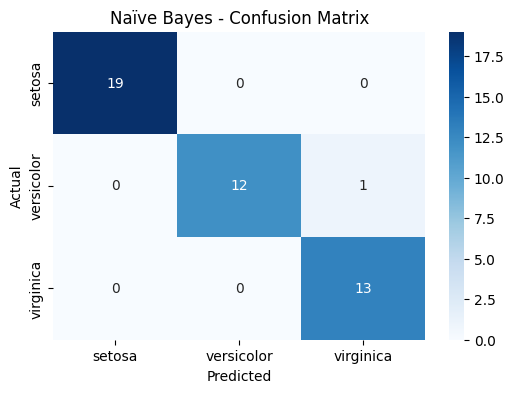

In [18]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naïve Bayes - Confusion Matrix')
plt.show()

## 🔹 Feature Distribution Visualization

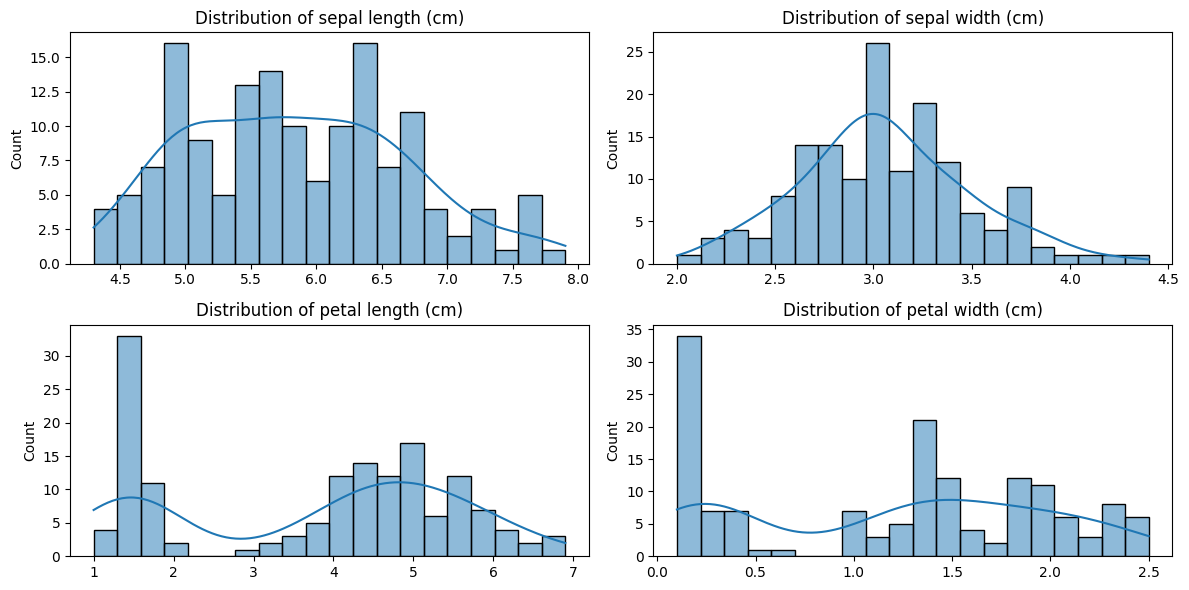

In [19]:
plt.figure(figsize=(12,6))
for i in range(X.shape[1]):
    plt.subplot(2, 2, i + 1)
    sns.histplot(X[:, i], kde=True, bins=20)
    plt.title(f"Distribution of {data.feature_names[i]}")
plt.tight_layout()
plt.show()

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA


In [22]:
# Load dataset
data = load_iris()
X, y = data.data, data.target

In [24]:
# Reduce dimensions to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [25]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [26]:
# Train Naïve Bayes model
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [27]:
# Predict
y_pred = nb.predict(X_test)

In [28]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8888888888888888


## 🔹 Decision Boundary Visualization

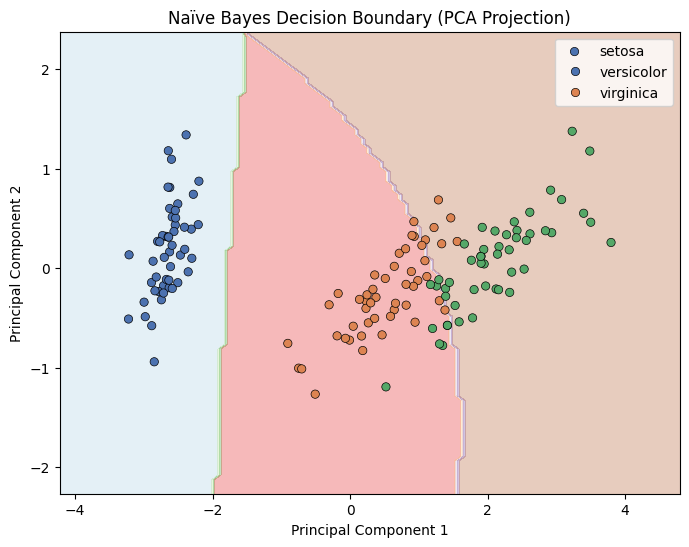

In [29]:
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1

xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Paired')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='deep', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Naïve Bayes Decision Boundary (PCA Projection)')
plt.legend(data.target_names)
plt.show()